In [1]:
import numpy as np
import scipy as sp
from scipy import special
import matplotlib.pyplot as plt

from numpy import arange
from scipy.integrate import odeint
from scipy import optimize
from scipy import misc

In [2]:
# parameters
m = 100                                #GeV DM Mass
Mp = 1.22e19                            #GeV Planck Mass

## Trying to parametrize the relativistic degree of freedom

In [3]:
import pandas as pd

In [4]:
dfgstar_squar1=pd.DataFrame([
    {'T':0.01 *1E-3,'gstar_squar': np.sqrt(3.38)},
    {'T':0.03 *1E-3,'gstar_squar': np.sqrt(3.38)},
    {'T':0.05 *1E-3,'gstar_squar': np.sqrt(3.38)},     #taken from the presentation graphic
    {'T':0.3 *1E-3,'gstar_squar': np.sqrt(6)},
    {'T':1E-3,'gstar_squar':np.sqrt(10.75)},     #taken from the presentation graphic
    {'T':10*1E-3,'gstar_squar':np.sqrt(10.75)},
    ])

dfgstar_squar2=pd.DataFrame([
    {'T':1E-3,'gstar_squar':np.sqrt(10.75)},     #taken from the presentation graphic
    {'T':5*1E-3,'gstar_squar':np.sqrt(10.75)},
    {'T':10*1E-3,'gstar_squar':np.sqrt(10.75)},
    {'T':80*1E-3,'gstar_squar':np.sqrt(17.25)},     #taken from the presentation graphic
    {'T':250*1E-3,'gstar_squar':np.sqrt(61.75)},     #taken from the presentation graphic
    {'T':800*1E-3,'gstar_squar':np.sqrt(75.75)},     #taken from the presentation graphic
    {'T':1,'gstar_squar':8.7},       # I leave it
    {'T':10,'gstar_squar':np.sqrt(86.25)},     #taken from the presentation graphic
    #{'T':50,'gstar_squar':np.sqrt(96.25)},     #taken from the presentation graphic
    #{'T':100,'gstar_squar':10.2}      #I leave it too
    ])


# Here I am trying to do a better parametrization with two different behaviour.
# The g_* function seems like a "step function" so let's try to use two activation 
# functions together and two sets of data.

In [5]:
dfgstar_squar1

,T,gstar_squar
0,0.00001,1.838478
1,0.00003,1.838478
2,0.00005,1.838478
3,0.00030,2.449490
4,0.00100,3.278719
5,0.01000,3.278719


In [6]:
dfgstar_squar2

,T,gstar_squar
0,0.001,3.278719
1,0.005,3.278719
2,0.010,3.278719
3,0.080,4.153312
4,0.250,7.858117
5,0.800,8.703448
6,1.000,8.700000
7,10.000,9.287088


In [7]:
dfgstar_squar1['T']

0    0.00001
1    0.00003
2    0.00005
3    0.00030
4    0.00100
5    0.01000
Name: T, dtype: float64

In [8]:
from scipy import optimize

In [9]:
#f=lambda T,a,b,c: a/(1+np.exp(-b*(T-c)))  ********(swith it off for a moment)

def f(T,a,b,c): 
    return a/(1+np.exp(-b*(T-c))) 

#a + b*T + c*T**2 + d*T**3 + e*T**4 + f*T**5 + g*T**6 DO NOT WORK


In [10]:
param1,somthing1 =optimize.curve_fit(f,dfgstar_squar1['T'],dfgstar_squar1['gstar_squar'],p0=(0,0,0))  #***(added a 0)

# Use non-linear least squares to fit a function, f, to data.

# scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True,
# bounds=(- inf, inf), method=None, jac=None, *, full_output=False, **kwargs)

#p gives initial guess for the parameters


In [11]:
param2,somthing2 =optimize.curve_fit(f,dfgstar_squar2['T'],dfgstar_squar2['gstar_squar'],p0=(0,0,0))

In [12]:
param1  

array([ 3.32600557e+00,  3.22769290e+03, -3.38272021e-05])

In [13]:
param2

array([8.94336315, 9.3846188 , 0.07037282])

In [14]:
g_good1= lambda T: f(T,a=param1[0],b=param1[1],c=param1[2])  
g_good2= lambda T: f(T,a=param2[0],b=param2[1],c=param2[2]) 

#this is a function just to call the right "function" with data on it.

In [15]:
#print(g_good(T))

In [16]:
#T=np.linspace(np.log10(1E-5),np.log10(100), 1000)
#print(T)

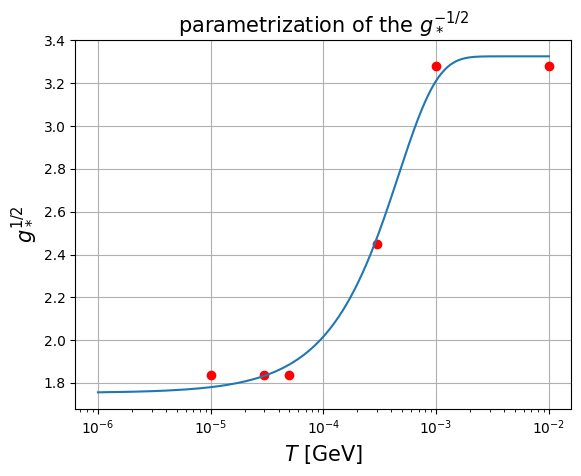

In [17]:
#T=np.logspace(np.log10(1E-5),np.log10(100))
T1=np.linspace(1E-6,1E-2, 10000)
plt.semilogx(dfgstar_squar1['T'],dfgstar_squar1['gstar_squar'],'ro') #semilogx Make a plot with log scaling on the x axis.
plt.plot(T1,g_good1(T1) )   #BUT THAT WASN'T THE PHASE SPACE FUNCTION? SO THIS PLOT ISN'T REFERRING TO THAT? NO, IS G STAR SQUARED BUT HOW?!
plt.xlabel('$T$ [GeV]',size=15)
plt.ylabel(r'$g_*^{1/2}$',size=15)

plt.title('parametrization of the $g_*^{-1/2}$', size= 15)
#plt.legend()
plt.grid()

# Fit the first part

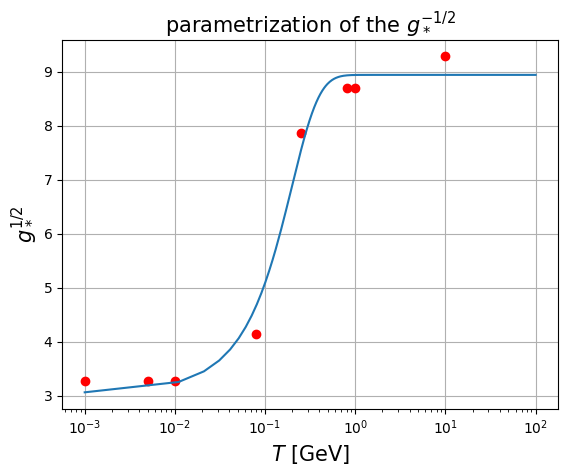

In [18]:
#T=np.logspace(np.log10(1E-5),np.log10(100))
T2=np.linspace(1E-3,100,10000)
plt.semilogx(dfgstar_squar2['T'],dfgstar_squar2['gstar_squar'],'ro') #semilogx Make a plot with log scaling on the x axis.
plt.plot(T2,g_good2(T2) )   #BUT THAT WASN'T THE PHASE SPACE FUNCTION? SO THIS PLOT ISN'T REFERRING TO THAT? NO, IS G STAR SQUARED BUT HOW?!
plt.xlabel('$T$ [GeV]',size=15)
plt.ylabel(r'$g_*^{1/2}$',size=15)

plt.title('parametrization of the $g_*^{-1/2}$', size= 15)
#plt.legend()
plt.grid()

# Fit the second one

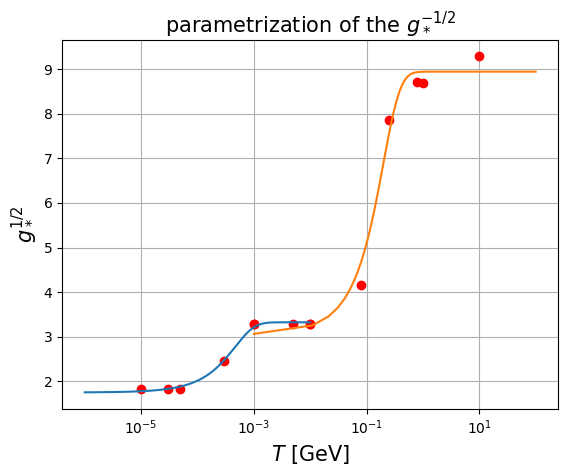

In [19]:
plt.semilogx(dfgstar_squar1['T'],dfgstar_squar1['gstar_squar'],'ro')
plt.semilogx(dfgstar_squar2['T'],dfgstar_squar2['gstar_squar'],'ro')
plt.plot(T1,g_good1(T1) )
plt.plot(T2,g_good2(T2) )
plt.xlabel('$T$ [GeV]',size=15)
plt.ylabel(r'$g_*^{1/2}$',size=15)

plt.title('parametrization of the $g_*^{-1/2}$', size= 15)

plt.grid()

# Put them together.
# Nothing special but better than before, almost similar

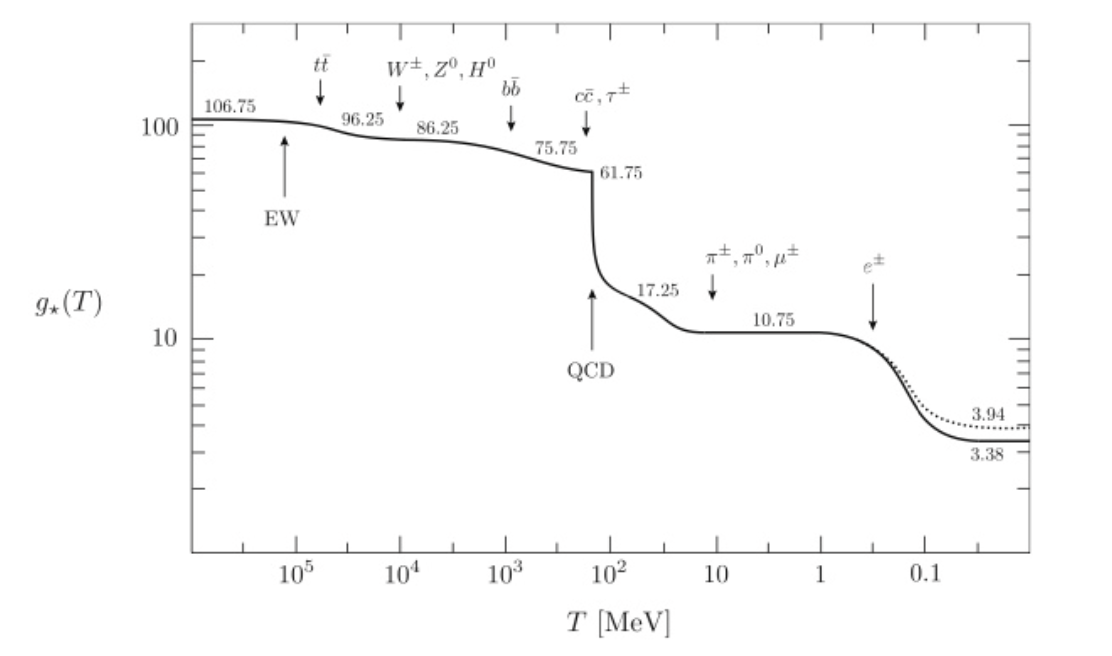

### Implementation of the freeze-out with the new parametrization of $g_*^{1/2}$

In [20]:
from scipy import integrate

In [21]:
def Yeq(x):
    return 0.145*x**(3/2)*np.exp(-x)

In [22]:
global k
k=1
fk=lambda sigmav: np.sqrt(np.pi*(Mp**2)/45)*m*sigmav  #starting to build the dY/dx

def BEx(x,m=100):
    T=m/x
    if T< 1E-2:
        return k*g_good1(T)/x**2   #missing piece of the formula.
    else:
        return k*g_good2(T)/x**2

In [23]:
def BE(Y,x):
    return -(Y**2-Yeq(x)**2)*BEx(x)   #putting together the things to have the right formula

#THESE FUNCTIONS HAVE BEEN CREATED TO ACHIVE THE COMPLETE FORMULA FOR THE dY/dx

/usr/local/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


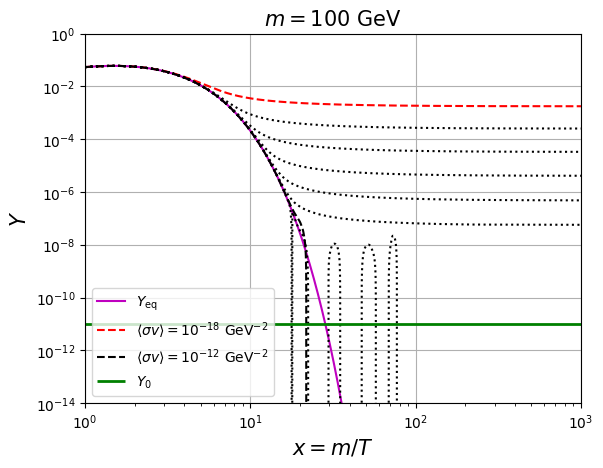

In [24]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'m',label=r'$Y_{\rm eq}$')




k=fk(sigmav=1E-18)  
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'r--',label=r'$\langle \sigma v \rangle = 10^{-18}\ {\rm GeV}^{-2}$')

k=fk(sigmav=1E-17)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-16)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-14)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-13)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')


#*****************
k=fk(sigmav=1E-10)                #WHAT HAPPENS WHEN THE AVERAGE CROSS SECTION TIMES VELOCITY GOES DOWN 1E-11?!?!?                                                        
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-12)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k--',label=r'$\langle \sigma v \rangle = 10^{-12}\ {\rm GeV}^{-2}$')  #THAT'S THE LAST BLACK LINE




plt.hlines(1E-11,1,1000,linestyles='-',color='g',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE  


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

# x grows in time means that the temperature decrease

### Now even with the average cross section of $10^{-12}$ gives problems.
#### Still to understand better